<a href="https://colab.research.google.com/github/Anju15Chauhan/Detecting_Fake_Jobs_Postings/blob/main/Spam_Message_Detector_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **About Dataset**
You are working in a data consulting company. Your client want you to build a spam detector so that employees get only relevant messages/email and it filters out all irrelevant/spam messages
Your IT Team has already scraped all the messages in an excel file for you
The files contain one message per line.
Each line is composed of different message
You need to develop a spam detector so that whenever a new message hits inbox. The model should be able to guage whether it is a spam or an ham message.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
spam_df = pd.read_csv('/content/emails_V2.csv.zip')
spam_df.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1.0
1,Subject: the stock trading gunslinger fanny i...,1.0
2,Subject: unbelievable new homes made easy im ...,1.0
3,Subject: 4 color printing special request add...,1.0
4,"Subject: do not have money , get software cds ...",1.0


In [9]:
spam_df.tail(10)


,text,spam
2033,Subject: fwd : dinner for paula return - path...,0.0
2034,Subject: wall street journal subscription goo...,0.0
2035,Subject: enron research and ebs engineering an...,0.0
2036,Subject: re : risk magazine - enron sponsored ...,0.0
2037,Subject: understanding and applying financial ...,0.0
2038,Subject: the installation of the equipment you...,0.0
2039,Subject: all about current and near future gas...,0.0
2040,Subject: maureen ' s expenses it appears that...,0.0
2041,Subject: interview - numerical methods & finan...,0.0
2042,"Subject: sevil yaman hi norma , sevil ' s pr...",0.0


# **Structural Analysis**

In [7]:
spam_df.shape

(2043, 2)

In [8]:
spam_df.describe()

,spam
count,2043.000000
mean,0.669604
std,0.470471
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [10]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2043 entries, 0 to 2042
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    2043 non-null   object 
 1   spam    2043 non-null   float64
dtypes: float64(1), object(1)
memory usage: 47.9+ KB


In [11]:
spam_df.columns

Index(['text', 'spam'], dtype='object')

In [12]:
spam_df.isnull().sum()

,0
text,0
spam,0


In [15]:
spam_df['spam'].unique()

array([1., 0.])

# **UNIVARIATE ANALYSIS**

In [16]:
spam_df['spam'].value_counts()

,count
spam,
1.0,1368
0.0,675


In [17]:
spam = spam_df[spam_df['spam']==1]
spam.shape

(1368, 2)

In [18]:
ham = spam_df[spam_df['spam']==0]
ham.shape

(675, 2)

In [19]:
percent_spam = spam.shape[0]/(ham.shape[0]+spam.shape[0])*100
percent_spam

66.96035242290749

In [20]:
percent_ham = ham.shape[0]/(ham.shape[0]+spam.shape[0])*100
percent_ham

33.03964757709251

<Axes: xlabel='spam', ylabel='count'>

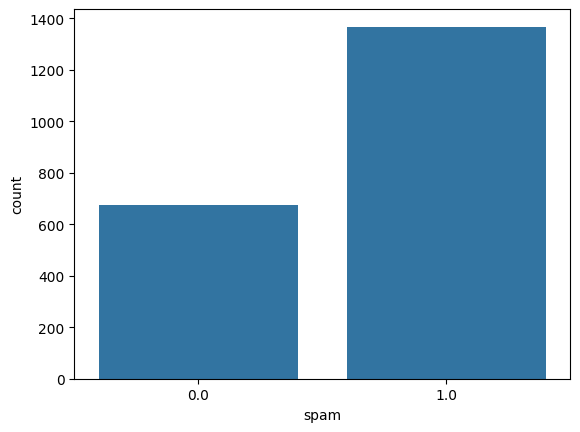

In [22]:
sns.countplot(x='spam', data=spam_df)

# **Data Preprocessing**

In [23]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
test = "hello, abhishek sir i am very happy to learn thr case studies in ypur class!"

In [25]:
test_punc_removed = [char for char in test if char not in string.punctuation]
test_punc_removed

['h',
 'e',
 'l',
 'l',
 'o',
 ' ',
 'a',
 'b',
 'h',
 'i',
 's',
 'h',
 'e',
 'k',
 ' ',
 's',
 'i',
 'r',
 ' ',
 'i',
 ' ',
 'a',
 'm',
 ' ',
 'v',
 'e',
 'r',
 'y',
 ' ',
 'h',
 'a',
 'p',
 'p',
 'y',
 ' ',
 't',
 'o',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 ' ',
 't',
 'h',
 'r',
 ' ',
 'c',
 'a',
 's',
 'e',
 ' ',
 's',
 't',
 'u',
 'd',
 'i',
 'e',
 's',
 ' ',
 'i',
 'n',
 ' ',
 'y',
 'p',
 'u',
 'r',
 ' ',
 'c',
 'l',
 'a',
 's',
 's']

In [26]:
test = "hello, abhishek sir i am very happy to learn thr case studies in ypur class!"

test_punc_removed2 = []

for char in test:
    if char not in string.punctuation:
        test_punc_removed2.append(char)

In [27]:
test_punc_removed2

['h',
 'e',
 'l',
 'l',
 'o',
 ' ',
 'a',
 'b',
 'h',
 'i',
 's',
 'h',
 'e',
 'k',
 ' ',
 's',
 'i',
 'r',
 ' ',
 'i',
 ' ',
 'a',
 'm',
 ' ',
 'v',
 'e',
 'r',
 'y',
 ' ',
 'h',
 'a',
 'p',
 'p',
 'y',
 ' ',
 't',
 'o',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 ' ',
 't',
 'h',
 'r',
 ' ',
 'c',
 'a',
 's',
 'e',
 ' ',
 's',
 't',
 'u',
 'd',
 'i',
 'e',
 's',
 ' ',
 'i',
 'n',
 ' ',
 'y',
 'p',
 'u',
 'r',
 ' ',
 'c',
 'l',
 'a',
 's',
 's']

In [28]:
test_punc_removed_join = ''.join(test_punc_removed)

In [29]:
test_punc_removed_join

'hello abhishek sir i am very happy to learn thr case studies in ypur class'

# **REMOVING STOPWORDS**

In [30]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [56]:
def preprocess(document, stem=True):
    'changes document to lower case, removes stopwords and lemmatizes/stems the remainder of the sentence'

    # change sentence to lower case
    document = document.lower()

    # tokenize into words
    words = word_tokenize(document)

    # remove stop words
    words = [word for word in words if word not in stopwords.words("english")]

    if stem:
        words = [stemmer.stem(word) for word in words]
    else:
        words = [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words]

    # join words to make sentence
    document = " ".join(words)

    return document

# **Stemming and Lemmatization**

In [57]:
## initialise the inbuilt Stemmer and the Lemmatizer
stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

In [60]:
## - Performing the preprocessing steps on all messages
spam_df['text'] = spam_df['text'].apply(lambda x: preprocess(x))



In [63]:
print(messages_set[:20])

[]


# **Preparing to create features**

In [64]:
## - creating a single list of all words in the entire dataset for feature list creation

def get_words_in_messages(messages):
    all_words = []
    for (message, label) in messages:
      all_words.extend(message)
    return all_words

In [65]:
## - creating a final feature list using an intuitive FreqDist, to eliminate all the duplicate words
## Note : we can use the Frequency Distribution of the entire dataset to calculate Tf-Idf scores like we did earlier.

def get_word_features(wordlist):

    #print(wordlist[:10])
    wordlist = nltk.FreqDist(wordlist)
    word_features = wordlist.keys()
    return word_features

In [66]:
## - creating the word features for the entire dataset
word_features = get_word_features(get_words_in_messages(messages_set))
print(len(word_features))

0


# **Preparing to create a train and test set**

In [67]:
## - creating slicing index at 80% threshold
sliceIndex = int((len(messages_set)*.8))

In [68]:
## - shuffle the pack to create a random and unbiased split of the dataset
random.shuffle(messages_set)

NameError: name 'random' is not defined